<a href="https://colab.research.google.com/github/NatalieGo/MFTI_hackathon_1/blob/main/hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install xgboost

**Модель для распознавания по постам склонных к суициду людей.**

**Описание концепции продукта**

*Возможные области применения :*

Обнаружение суицидальных мыслей : набор данных можно использовать для обучения моделей автоматическому обнаружению и пометке постов, содержащих потенциально суицидальный контент, что позволяет платформам предпринимать соответствующие действия.
Поддержка психического здоровья : выводы из этого набора данных можно использовать для разработки инструментов, которые предлагают ресурсы или вмешательства в области психического здоровья пользователям, проявляющим признаки стресса.
Исследование анализа настроений : исследователи могут анализировать лингвистические модели и настроения как несуицидальных, так и потенциально суицидальных твитов, чтобы получить представление о языке, используемом людьми в разных эмоциональных состояниях.
Осведомленность о проблемах общественного здравоохранения : набор данных можно использовать для повышения осведомленности о проблемах психического здоровья и важности ответственного использования социальных сетей.
Можно использовать в том числе для контекстной рекламы психологической помощи и линии доверия.

#TODO: подумать и написать лучше


Датасет для обучения взят с kaggle: #TODO: добавить ссылки на датасет
Также, первый датасет у нас переведен с английского на русский. Второй датасет - изначально был на русском.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.ensemble import BaggingClassifier

In [ ]:
#TODO: какой путь будет во время защиты?
dataset_path = 'C:/Users/днс/Documents/jupyter/suicid97/ru_Suicide.csv'

In [ ]:
data = pd.read_csv(dataset_path)
display(data)
display(data.info())

,Твитнуть,Самоубийство
0,готовлю обед,Не суицидный пост
1,@Alexia Тебе нужны его деньги.,Не суицидный пост
2,"@dizzyhrvy мне потребовалась целая вечность, ч...",Пост о потенциальном самоубийстве
3,"@jnaylor #kiwitweets Привет, Джер! С каких это...",Не суицидный пост
4,Пробуем «Вкусную библиотеку 2»; с неоднозначны...,Не суицидный пост
...,...,...
1782,"я забыл, как сильно я люблю свою Nokia N95-1",Не суицидный пост
1783,Начинаю свой день с позитива! Чтобы быть велик...,Не суицидный пост
1784,"@belledame222 Эй, сейчас 5 утра... отдай должн...",Не суицидный пост
1785,"Две пьяные подруги вваливаются в мою комнату, ...",Не суицидный пост


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Твитнуть      1787 non-null   object
 1   Самоубийство  1787 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


None

В данном датасете информация о 1787 твитах (англоязычных пользователей, переведенных на русский язык), которые проходили оценку и распределялись по 2м категориям: «Не суицидный пост» и «Пост о потенциальном самоубийстве»
Содержит 1787 строк, 2 столбца («Твитнуть» и «Самоубийство» ), оба столбца имеют тип object. Дата сет в столбце «Твитнуть» содержит лишние данные в качестве ссылок на твит. В том числе нечитаемые символы.

In [ ]:
data.eq("").sum()

Твитнуть        0
Самоубийство    0
dtype: int64

Идентификация пропущенных значений (NaN, NULL, пустых строк и т. д.) в датафрейме. По результатам проверки пустых строк в датафрейме нет. Идентификация выбросов данных. Вводим дамми переменные для столбца «самоубийство» для удобства оценки. И переводим в двоичный код.

In [ ]:
# вводим дамми переменные для преобразования категориальных признаков в числовые для подсчета данных
data['Самоубийство']= data['Самоубийство'].astype(str)
data_dummies = pd.get_dummies(data['Самоубийство'], drop_first=True, dummy_na=False)
display(data_dummies)

,Пост о потенциальном самоубийстве
0,0
1,0
2,1
3,0
4,0
...,...
1782,0
1783,0
1784,0
1785,0


In [ ]:
#Посчитаем сколько постов относятся к  «Пост о потенциальном самоубийстве»
data_dummies = pd.get_dummies(data['Самоубийство'], drop_first=True, dummy_na=False)
bool_counts = data_dummies.select_dtypes(include='bool').apply(lambda x: x.value_counts())
# изменяем булевые переменные на двоичный код (1 и 0), для удобного подсчета в графике
data_dummies['Пост о потенциальном самоубийстве'] = data_dummies['Пост о потенциальном самоубийстве'].astype(int)
display(data_dummies['Пост о потенциальном самоубийстве'])
#TODO: часть кода кажется можно убрать
data.describe()

0       0
1       0
2       1
3       0
4       0
       ..
1782    0
1783    0
1784    0
1785    0
1786    0
Name: Пост о потенциальном самоубийстве, Length: 1787, dtype: int32

,Твитнуть,Самоубийство
count,1787,1787
unique,1775,2
top,#VALUE!,Не суицидный пост
freq,2,1127


Посчитаем сколько постов относятся к  «Пост о потенциальном самоубийстве», получаем что : «Не суицидный пост» - 1127  и «Пост о потенциальном самоубийстве» - 660

In [ ]:
# используем IPython.display для красивого вывода всего текста в таблице
from IPython.display import display, HTML
data['Твитнуть'] = data['Твитнуть'].replace(r'http[s]?://\S+|@\w+|/|&\w+|ð\w+|¶+|RT|aâ¦|@|w\w+|:|#\w+|_|-|ð|ó|¦|§|®|¥|¢|´|¿|Ã¯ÂÂ½', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].str.replace(r'^\,+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].str.lstrip()
display(HTML(data.head(10).to_html()))

,Твитнуть,Самоубийство
0,готовлю обед,Не суицидный пост
1,Тебе нужны его деньги.,Не суицидный пост
2,"мне потребовалась целая вечность, чтобы собрать эту ерунду. я собираюсь пойти спать на несколько ДНЕЙ",Пост о потенциальном самоубийстве
3,"Привет, Джер! С каких это пор ты начал твиттерить?",Не суицидный пост
4,"Пробуем «Вкусную библиотеку 2»; с неоднозначными результатами. Штрихкод подумал, что я хочу добавить спортивный бюстгальтер вместо тренировки. Крутое приложение!",Не суицидный пост
5,"О, приятно это слышать. Но неужели все уже закончилось? Или вы продолжите это после Страстной недели?",Не суицидный пост
6,"у тебя есть список других ? Тебе придется поделиться этим, Амиго!",Не суицидный пост
7,"То, что Шейн снял о тебе сериал, не означает, что люди воспринимают тебя всерьез, да…",Пост о потенциальном самоубийстве
8,Пришло время расслабиться в варшавском пивном саду,Не суицидный пост
9,"Я ненавижу свою жизнь, я надеюсь, что скоро умру или умру, я слишком устал от всего",Пост о потенциальном самоубийстве


In [ ]:
data['suid_bool'] = pd.get_dummies(data['Самоубийство'], drop_first=True, dummy_na=False)


,Пост о потенциальном самоубийстве
0,0
1,0
2,1
3,0
4,0
...,...
1782,0
1783,0
1784,0
1785,0


In [ ]:
data

,Твитнуть,Самоубийство,suid_bool
0,готовлю обед,Не суицидный пост,0
1,Тебе нужны его деньги.,Не суицидный пост,0
2,"мне потребовалась целая вечность, чтобы собрат...",Пост о потенциальном самоубийстве,1
3,"Привет, Джер! С каких это пор ты начал твиттер...",Не суицидный пост,0
4,Пробуем «Вкусную библиотеку 2»; с неоднозначны...,Не суицидный пост,0
...,...,...,...
1782,"я забыл, как сильно я люблю свою Nokia N951",Не суицидный пост,0
1783,Начинаю свой день с позитива! Чтобы быть велик...,Не суицидный пост,0
1784,"Эй, сейчас 5 утра... отдай должное девушке за ...",Не суицидный пост,0
1785,"Две пьяные подруги вваливаются в мою комнату, ...",Не суицидный пост,0


In [ ]:
#Удалим некачественные строки
data1 = data.drop(index=[497, 505, 536, 1002, 1017, 1047])

In [ ]:
# сохраним новый вариант Датасета
data1.to_csv(work_dataset_path, index=False, sep=';')

**Модели машинного обучения**

Здесь видим задачу классификации при работе с текстом.
##TODO: написать, какие модели для задач классификации подходят, какие выбрали

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\днс\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# work_dataset_path = 'C:/Users/днс/Documents/jupyter/suicid97/ru_Suicide_new.csv'
# for dirname, _, filenames in os.walk('C:/Users/днс/Documents/jupyter/suicid97/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
#TODO: перенести весь импорт наверх
import numpy as np
import pandas as pd
import re
import nltk
#import demoji
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, roc_curve, auc)
from sklearn.metrics import confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import io
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#demoji.download_codes()
#TODO: nltk не нужен
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\днс\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv(work_dataset_path, sep=';')

In [ ]:
df.head()

,Твитнуть,Самоубийство,suid_bool
0,готовлю обед,Не суицидный пост,0
1,Тебе нужны его деньги.,Не суицидный пост,0
2,"мне потребовалась целая вечность, чтобы собрат...",Пост о потенциальном самоубийстве,1
3,"Привет, Джер! С каких это пор ты начал твиттер...",Не суицидный пост,0
4,Пробуем «Вкусную библиотеку 2»; с неоднозначны...,Не суицидный пост,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Твитнуть      1779 non-null   object
 1   Самоубийство  1781 non-null   object
 2   suid_bool     1781 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 41.9+ KB


In [ ]:
# df.na.drop(how="any").show(truncate=False)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Твитнуть      1779 non-null   object
 1   Самоубийство  1779 non-null   object
 2   suid_bool     1779 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 55.6+ KB


In [ ]:
X = df['Твитнуть']
y = df['suid_bool']

In [ ]:
vectorizer = TfidfVectorizer(max_features = 5000) #Limiting to 5000 most frequent words for simplicity
X = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       229
           1       0.88      0.77      0.82       127

    accuracy                           0.88       356
   macro avg       0.88      0.86      0.86       356
weighted avg       0.88      0.88      0.88       356



Здесь precision - сколько предсказаний действительно относится к данному классу /  TP / (TP+FP)
Recall показывает, сколько предсказаний определённого класса верно. /  TP / (TP+FN)
F1-score — это геометрическое среднее точности и полноты. / 2 (Precision recall) / (Precision + recall)
#TODO: добавить пояснение по метрикам.

Support — фактическое количество примеров данного класса.

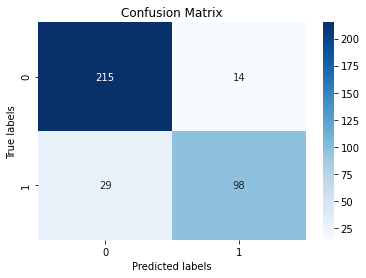

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

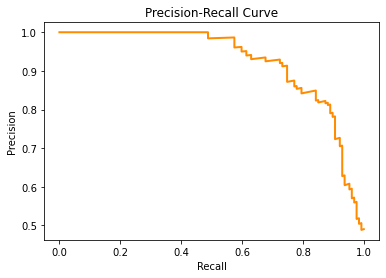

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
#TODO: добавить пояснение по вышесделанному


Теперь попробуем то же самое с моделью RandomForestClassifier

In [ ]:
rf_n_model = RandomForestClassifier(n_estimators=30, random_state=22)
#TODO: подобрать оптимальные параметры моделей
rf_n_model.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       229
           1       0.88      0.77      0.82       127

    accuracy                           0.88       356
   macro avg       0.88      0.86      0.86       356
weighted avg       0.88      0.88      0.88       356



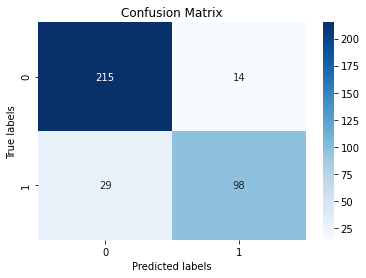

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

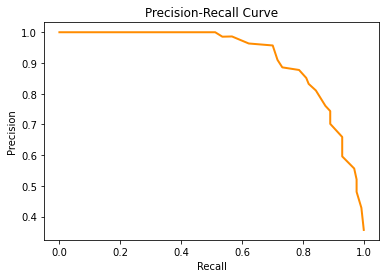

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, rf_n_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

И попробуем третью модель

In [ ]:
bg=BaggingClassifier()
bg.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       229
           1       0.88      0.77      0.82       127

    accuracy                           0.88       356
   macro avg       0.88      0.86      0.86       356
weighted avg       0.88      0.88      0.88       356



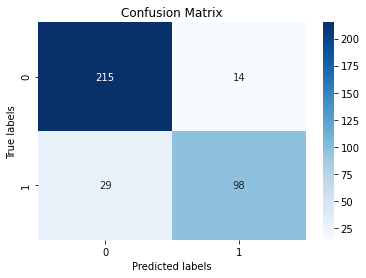

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

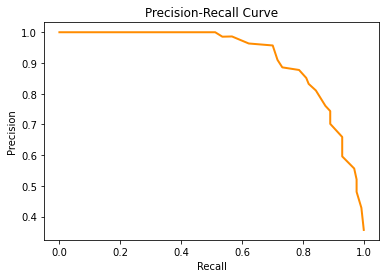

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, rf_n_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#TODO: Итого, сравнив 3 модели получаем:

Теперь посмотреть результаты наших уже обученных моделей на втором датасете, русскоязычном

In [ ]:
#TODO: mсюда вставить разбор и обработку второго датасета

In [ ]:
val_dataset_path = 'C:/Users/днс/Documents/jupyter/suicid97/ru_suicide2_from_json.csv'
df = pd.read_csv(val_dataset_path, sep=';')


In [ ]:
df.head()

,post,category
0,бывшая жена угрожает самоубийством недавно я н...,1
1,"я странный? на меня не влияют комплименты, есл...",0
2,наконецто 2020 год почти закончился... так что...,0
3,"мне нужна помощь, просто помоги мне, я так плачу",1
4,"я так растеряна. здравствуйте, меня зовут адам...",1


In [ ]:
vectorizer = TfidfVectorizer(max_features = 5000) #Limiting to 5000 most frequent words for simplicity
x = df['post']
X = vectorizer.fit_transform(x)
y_val = df['category']

In [ ]:
y_pred = clf.predict(X)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.86      0.65     24078
           1       0.60      0.22      0.32     23915

    accuracy                           0.54     47993
   macro avg       0.56      0.54      0.49     47993
weighted avg       0.56      0.54      0.49     47993



In [ ]:
#TODO: добавить слияние двух датасетов перед векторизацией текста.